In [ ]:
# 구글 드라이브랑 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 읽기
path = "/content/drive/MyDrive/Colab Notebooks/SAI 문제풀이/RockPaperScissor"
train_dir = path+'/train-set'
test_dir = path+'/test-set'

(1186, 300, 300)


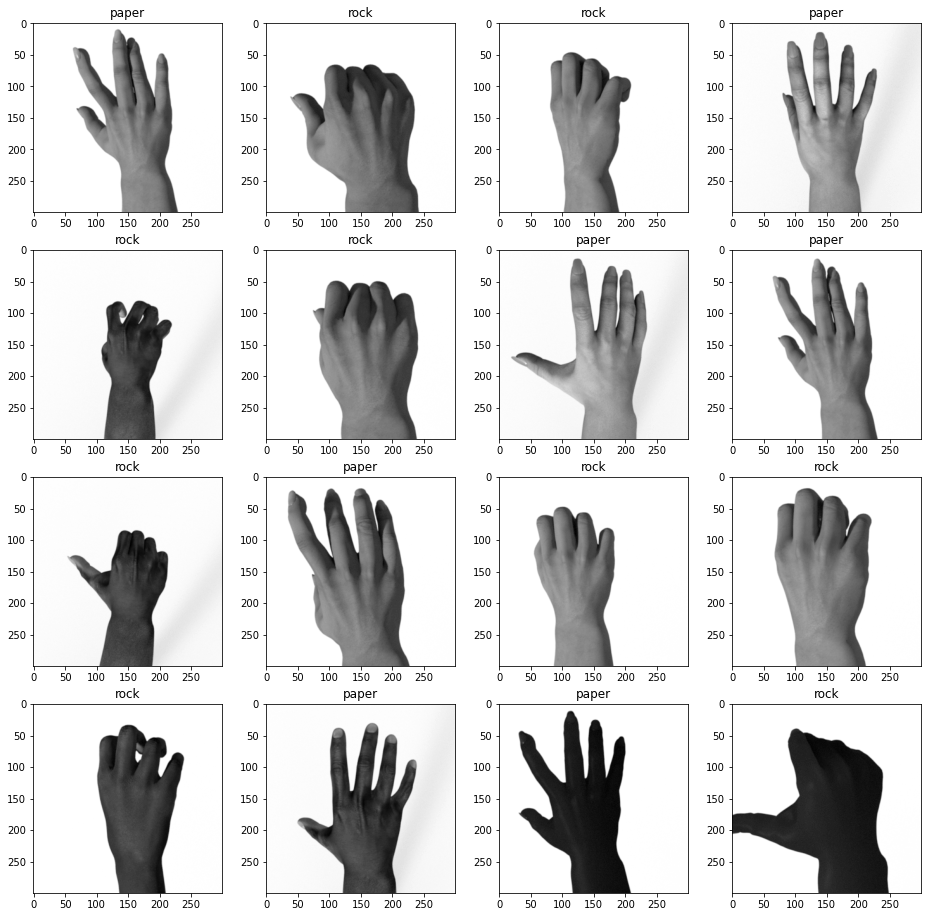

In [ ]:
# 데이터 별 사진 분류 클래스
import os
classes = os.listdir(train_dir)

# 데이터 정리하기
import cv2
X_input = []
y_input = []
for i, cls in enumerate(os.listdir(train_dir)):
  for img in os.listdir(os.path.join(train_dir, cls)):
    image = cv2.imread(os.path.join(train_dir,cls,img), cv2.IMREAD_GRAYSCALE)
    X_input.append(image)
    y_input.append(i)

X_test = []
y_test = []
for i, cls in enumerate(os.listdir(test_dir)):
  for img in os.listdir(os.path.join(test_dir, cls)):
    image = cv2.imread(os.path.join(test_dir,cls,img), cv2.IMREAD_GRAYSCALE)
    X_test.append(image)
    y_test.append(i)

import numpy as np
X_test = np.array(X_test)
y_test = np.array(y_test)
X_input = np.array(X_input)
y_input = np.array(y_input)

# 훈련 세트의 이미지 몇 개 확인해보기
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4,4,figsize=(16,16))
for i in range(16):
  idx = np.random.randint(0,X_input.shape[0]-1)
  img = X_input[idx]
  label = y_input[idx]
  axes[i//4][i%4].imshow(img,cmap='gray')
  axes[i//4][i%4].title.set_text(classes[label])

In [ ]:
# train set와 validation set 나누기
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_input,y_input,stratify=y_input,test_size = 0.2)

# 이미지 전처리
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

X_train = X_train.reshape(*(X_train.shape),1)
X_val = X_val.reshape(*(X_val.shape),1)
X_test = X_test.reshape(*(X_test.shape),1)

In [ ]:
# 합성곱 신경망 만들기
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation = 'relu', padding='same', input_shape = (300, 300, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation = 'relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(128, kernel_size=3, activation = 'relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(256, kernel_size=3, activation = 'relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 300, 300, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 37, 37, 128)     

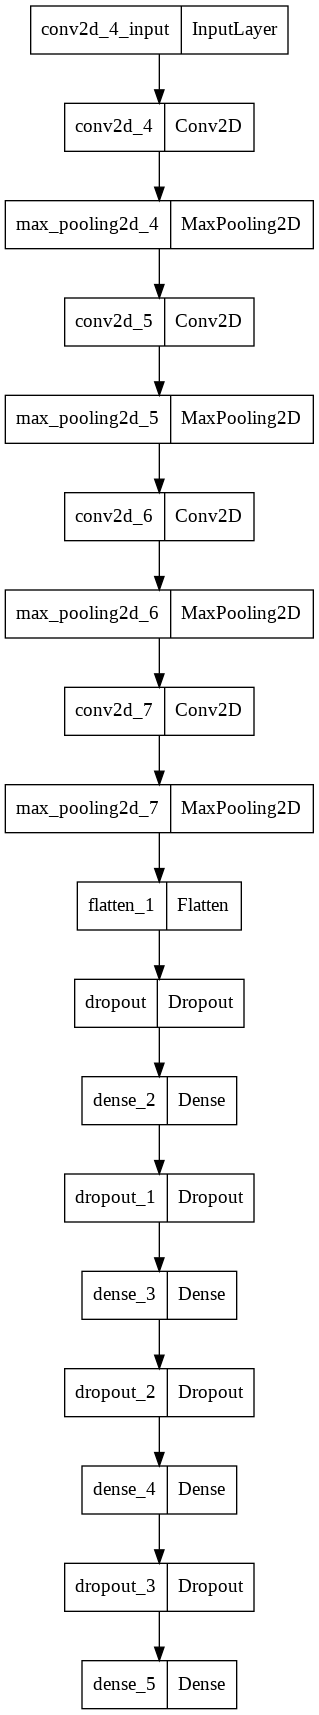

In [ ]:
# 층의 구성 그림으로 표현
keras.utils.plot_model(model)

In [ ]:
# 모델 컴파일과 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[checkpoint_cb, early_stopping_cb])

# 테스트 세트로 모델 평가
model.evaluate(X_test, y_test)

Epoch 1/100
30/30 [==============================] - 217s 7s/step - loss: 0.4863 - accuracy: 0.7521 - val_loss: 0.0251 - val_accuracy: 0.9874
Epoch 2/100
30/30 [==============================] - 212s 7s/step - loss: 0.0861 - accuracy: 0.9747 - val_loss: 0.0452 - val_accuracy: 0.9874
Epoch 3/100
30/30 [==============================] - 214s 7s/step - loss: 0.0247 - accuracy: 0.9895 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 4/100
30/30 [==============================] - 214s 7s/step - loss: 0.0125 - accuracy: 0.9947 - val_loss: 1.4380e-04 - val_accuracy: 1.0000
Epoch 5/100
30/30 [==============================] - 212s 7s/step - loss: 0.0141 - accuracy: 0.9958 - val_loss: 0.0236 - val_accuracy: 0.9916
Epoch 6/100
30/30 [==============================] - 214s 7s/step - loss: 0.0045 - accuracy: 0.9979 - val_loss: 1.7098e-05 - val_accuracy: 1.0000
Epoch 7/100
30/30 [==============================] - 213s 7s/step - loss: 6.8955e-04 - accuracy: 1.0000 - val_loss: 7.5206e-05 - val_accurac

[1.7645131349563599, 0.3333333432674408]